# Billionaire dataset descriptive analysis

# Step 5: Demographics analysis

Demographics

Questions:
- What is the gender distribution among billionaires? Are there patterns by industry or country?
- What is the average age of self-made billionaires compared to those with inherited wealth?
- What trends exist among billionaire birthdates (e.g., generational patterns)?

Insights:
- Disparities in gender and age across industries and regions.
- Trends in the rise of younger self-made billionaires.
- Generational shifts in wealth accumulation.

Look for differences between subgroups.

Techniques:
Gender Analysis:

- Compare average finalWorth between male and female billionaires.
- Count the number of billionaires by gender within each category or country.

Self-Made Analysis:
- Histogram for age distribution of self-made (status=D) vs. inherited (status=U) billionaires.
- Compare dominant industries for self-made vs. inherited billionaires.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

pd.set_option("display.max_columns", None)
sns.set_style('darkgrid')

In [3]:
df_bill_str = pd.read_csv("./datasets/billionaires_string.csv")
# df_bill_num = pd.read_csv("./datasets/billionaires_numeric.csv")
df_bill_num_cat = pd.read_csv("./datasets/billionaires_numeric_modified_3.csv")

In [4]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


## 5.1. Gender

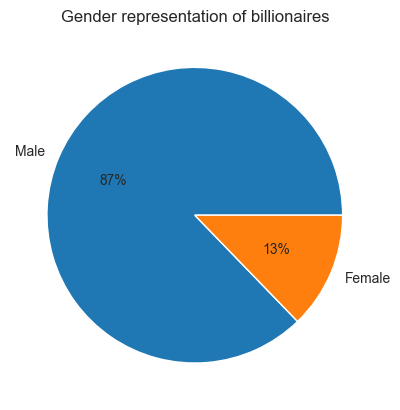

In [5]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('tab10') 

# plotting data on chart 
plt.pie(df_bill_num_cat['gender'].value_counts().reset_index()['count'],
        labels=df_bill_num_cat['gender'].value_counts().reset_index()['gender'] \
                .map(
                        {
                                'M' : "Male",
                                'F' : 'Female'
                        }
                )
        , colors=palette_color, autopct='%.0f%%') 

plt.title("Gender representation of billionaires")

# displaying chart 
plt.show() 

### Gender by country

In [6]:
# Get the top 10 countries by count
top_10_countries = df_bill_str['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df_bill_str[df_bill_str['country'].isin(top_10_countries)]

In [7]:
df_gender_country = df_top_10.groupby(['country', 'gender']).size().reset_index(name='count')

df_pivoted_gender = df_gender_country.pivot(index='country', columns='gender', values='count')

df_pivoted_gender = df_pivoted_gender.sort_values(by=['M', 'F'], ascending=False)  # Sort by total wealth
# wealth_pivot = wealth_pivot.drop(columns='TotalWealth')  # Drop the helper column after sorting

In [8]:
df_gender_country.head()

,country,gender,count
0,China,F,54
1,China,M,469
2,Germany,F,27
3,Germany,M,75
4,Hong Kong,F,12


In [9]:
df_pivoted_gender.head()

gender,F,M
country,,
United States,99,655
China,54,469
India,13,144
Russia,1,78
Germany,27,75


<Figure size 1200x800 with 0 Axes>

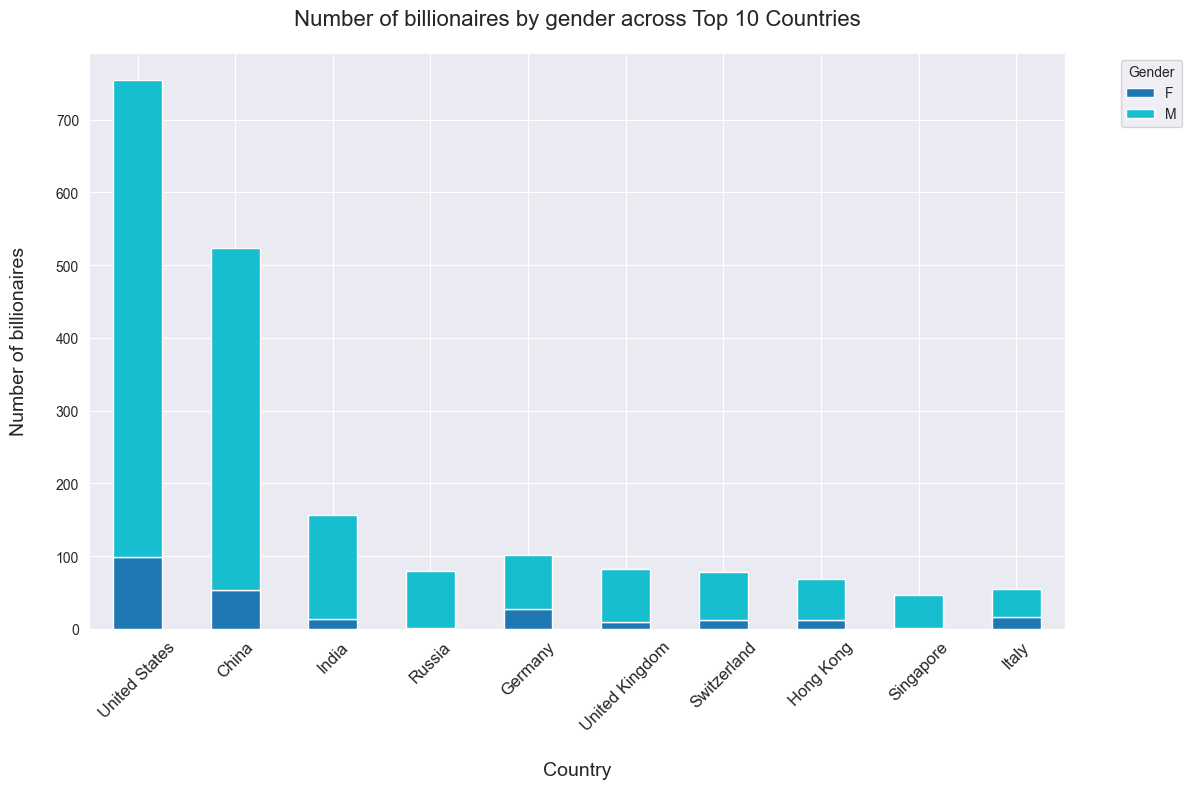

In [36]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_gender.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Number of billionaires by gender across Top 10 Countries', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=14, labelpad=20)
plt.ylabel('Number of billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Gender by industry

In [11]:
df_gender_category = df_top_10.groupby(['category', 'gender']).size().reset_index(name='count')

df_pivoted_gender_category = df_gender_category.pivot(index='category', columns='gender', values='count')

df_pivoted_gender_category = df_pivoted_gender_category.sort_values(by=['M', 'F'], ascending=True)  # Sort by total wealth

<Figure size 800x800 with 0 Axes>

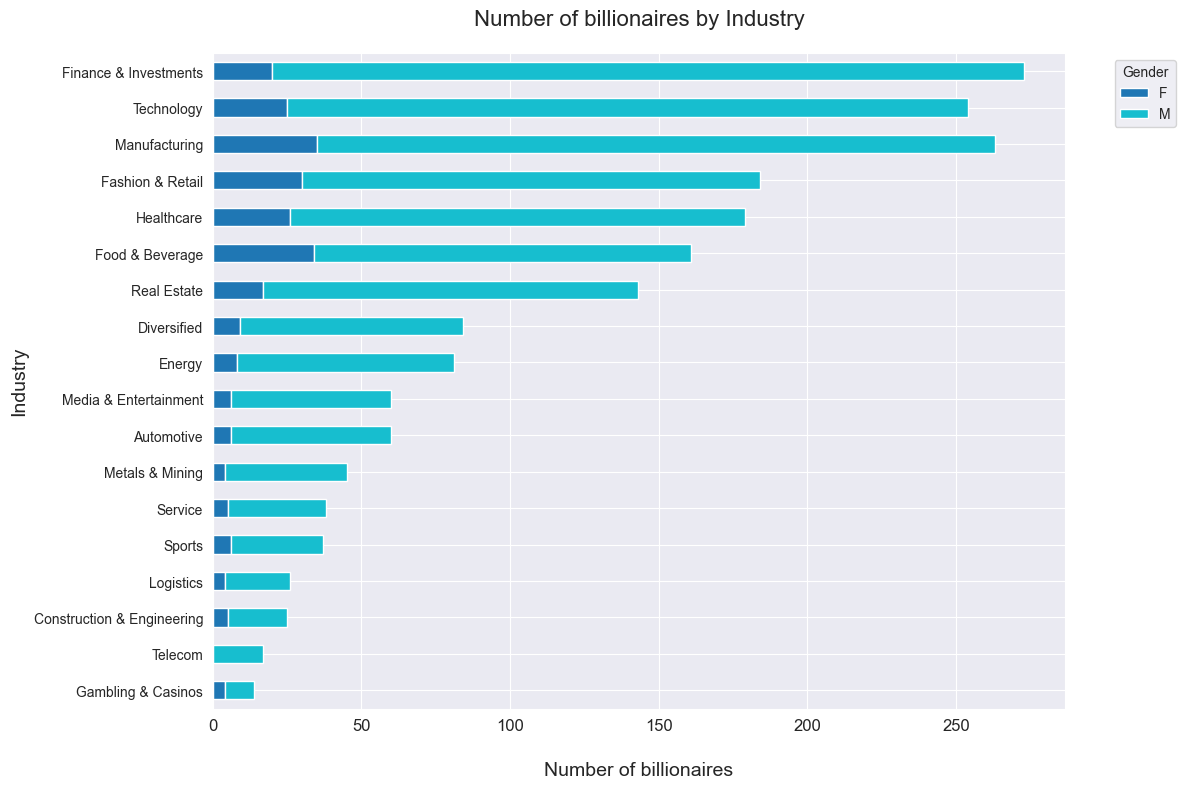

In [12]:
# Create the stacked bar chart
plt.figure(figsize=(8, 8))
df_pivoted_gender_category.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Number of billionaires by Industry', fontsize=16, pad=20)
plt.xlabel('Number of billionaires', fontsize=14, labelpad=20)
plt.ylabel('Industry', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

## 5.3. Self Made

In [13]:
df_selfmade_gender = df_bill_num_cat.groupby(['selfMade', 'gender']).size().reset_index(name='count')

df_pivoted_selfmade_gender = df_selfmade_gender.pivot(index='selfMade', columns='gender', values='count')

df_pivoted_selfmade_gender = df_pivoted_selfmade_gender.sort_values(by=['M', 'F'], ascending=True)  # Sort by total wealth

In [14]:
df_pivoted_selfmade_gender

gender,F,M
selfMade,,
False,241,587
True,96,1716


<Figure size 800x800 with 0 Axes>

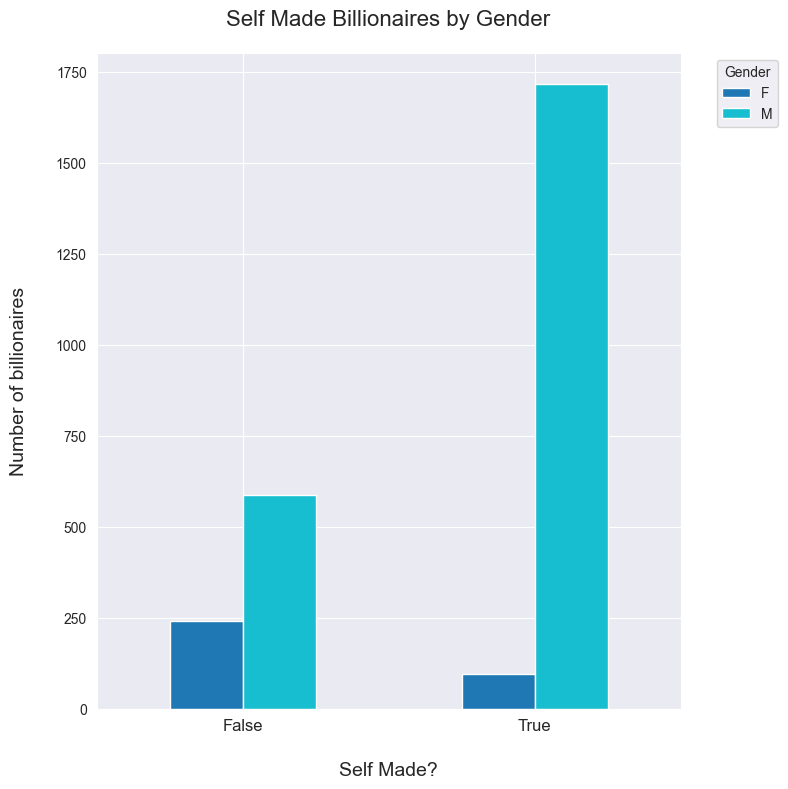

In [15]:
# Create the stacked bar chart
plt.figure(figsize=(8, 8))
df_pivoted_selfmade_gender.plot(kind='bar', stacked=False, figsize=(8, 8), cmap='tab10')

# Customize the plot
plt.title('Self Made Billionaires by Gender', fontsize=16, pad=20)
plt.xlabel('Self Made?', fontsize=14, labelpad=20)
plt.ylabel('Number of billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Get the top 10 countries by count
top_10_countries_num = df_bill_num_cat['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_num = df_bill_num_cat[df_bill_num_cat['country'].isin(top_10_countries)]

In [17]:
df_selfMade_country = df_top_10_num.groupby(['selfMade', 'country']).size().reset_index(name='count')

df_pivoted_selfMade = df_selfMade_country.pivot(index='country', columns='selfMade', values='count')

df_pivoted_selfMade = df_pivoted_selfMade.sort_values(by=[True, False], ascending=False)  # Sort by total wealth
# wealth_pivot = wealth_pivot.drop(columns='TotalWealth')  # Drop the helper column after sorting

<Figure size 1200x800 with 0 Axes>

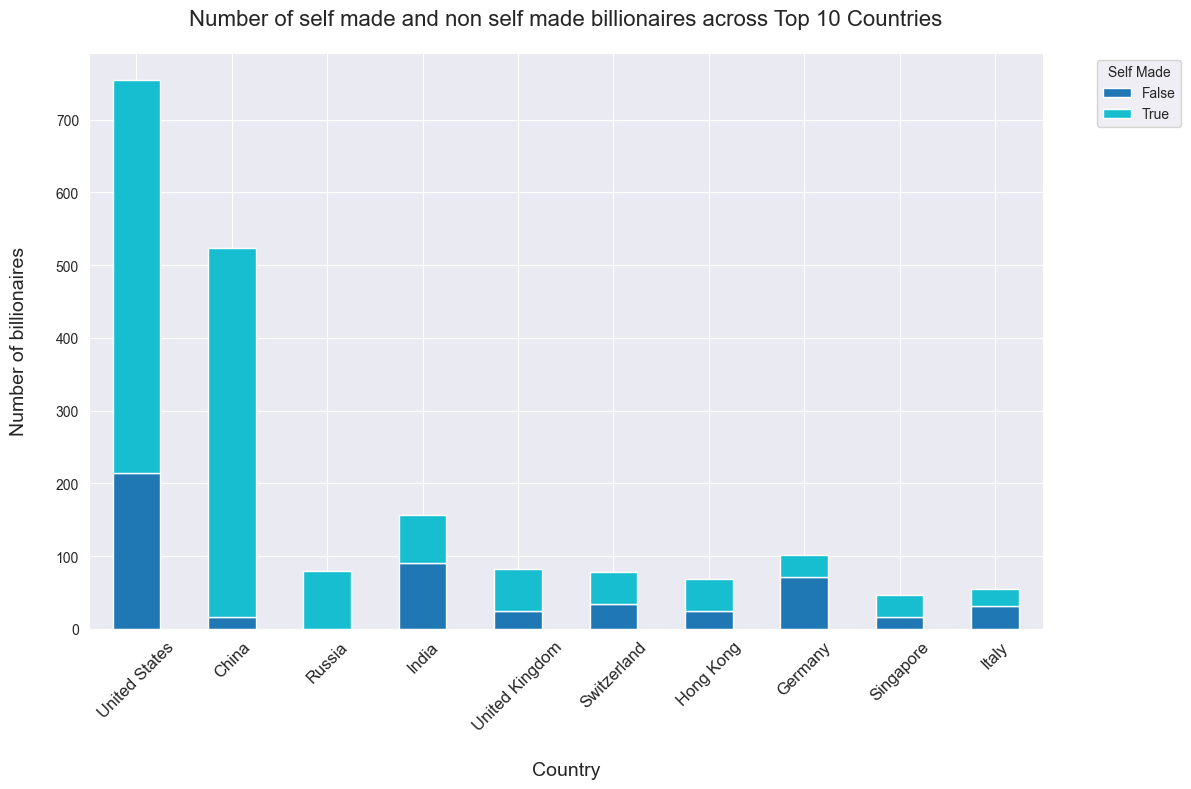

In [18]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_selfMade.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Number of self made and non self made billionaires across Top 10 Countries', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=14, labelpad=20)
plt.ylabel('Number of billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df_selfMade_category = df_top_10_num.groupby(['category', 'selfMade']).size().reset_index(name='count')

df_pivoted_selfMade_category = df_selfMade_category.pivot(index='category', columns='selfMade', values='count')

df_pivoted_selfMade_category = df_pivoted_selfMade_category.sort_values(by=[True, False], ascending=True)  # Sort by total wealth

<Figure size 800x800 with 0 Axes>

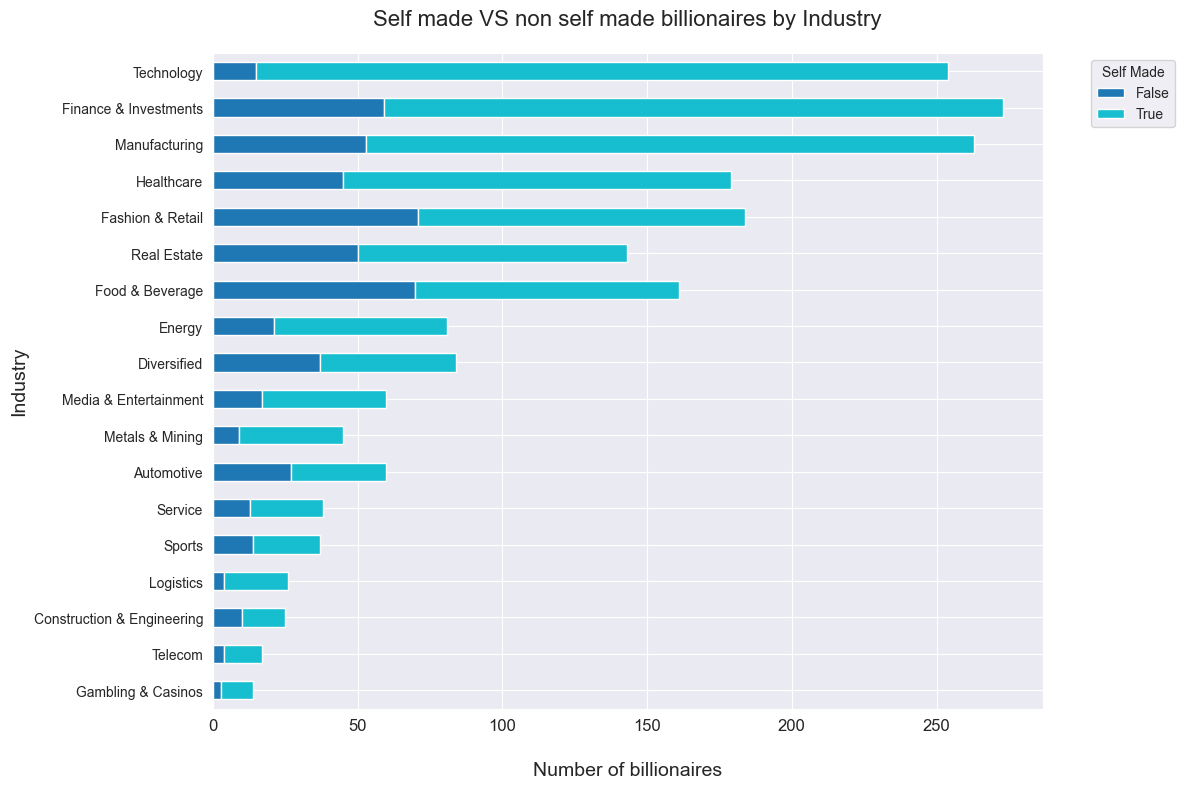

In [20]:
# Create the stacked bar chart
plt.figure(figsize=(8, 8))
df_pivoted_selfMade_category.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Self made VS non self made billionaires by Industry', fontsize=16, pad=20)
plt.xlabel('Number of billionaires', fontsize=14, labelpad=20)
plt.ylabel('Industry', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate total wealth by country
total_wealth_by_country = df_bill_num_cat.groupby('country')['finalWorth'].sum().reset_index()

# Select the top 10 countries by total wealth
top_countries = total_wealth_by_country.nlargest(6, 'finalWorth')['country']

# Filter data for the top 10 countries
filtered_data = df_bill_num_cat[df_bill_num_cat['country'].isin(top_countries)]

# Group data by country and industries, calculate total wealth
wealth_by_industry_country = filtered_data.groupby(['country', 'category'])['finalWorth'].sum().reset_index()

# Pivot the data for easier plotting (industries as columns)
wealth_pivot = wealth_by_industry_country.pivot(index='category', columns='country', values='finalWorth').fillna(0)

# Calculate total wealth per industry and sort industries in descending order
wealth_pivot['TotalWealth'] = wealth_pivot.sum(axis=1)  # Add a column for total wealth
wealth_pivot = wealth_pivot.sort_values(by='TotalWealth', ascending=True)  # Sort by total wealth
wealth_pivot = wealth_pivot.drop(columns='TotalWealth')  # Drop the helper column after sorting

In [21]:
# Get the top 10 countries by count
top_10_countries = df_bill_str['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df_bill_str[df_bill_str['country'].isin(top_10_countries)]

In [22]:
mean_age = df_bill_num_cat['age'].mean()
median_age = df_bill_num_cat['age'].median()

## 5.4. Final Worth by Gender

In [23]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


In [24]:
total_wealth_self_made = df_bill_num_cat.groupby(['selfMade'])['finalWorth'].sum().reset_index(name='SelfMadeTotalWealth')

mean_wealth_self_made = df_bill_num_cat.groupby(['selfMade'])['finalWorth'].mean().reset_index(name='SelfMadeMeanWealth')

In [25]:
total_wealth_gender = df_bill_num_cat.groupby(['gender'])['finalWorth'].sum().reset_index(name='GenderTotalWealth')

mean_wealth_gender = df_bill_num_cat.groupby(['gender'])['finalWorth'].mean().reset_index(name='GenderMeanWealth')

In [26]:
total_wealth_gender

,gender,GenderTotalWealth
0,F,1540200
1,M,10666600


In [27]:
mean_wealth_gender

,gender,GenderMeanWealth
0,F,4570.326409
1,M,4631.610942


<Figure size 800x800 with 0 Axes>

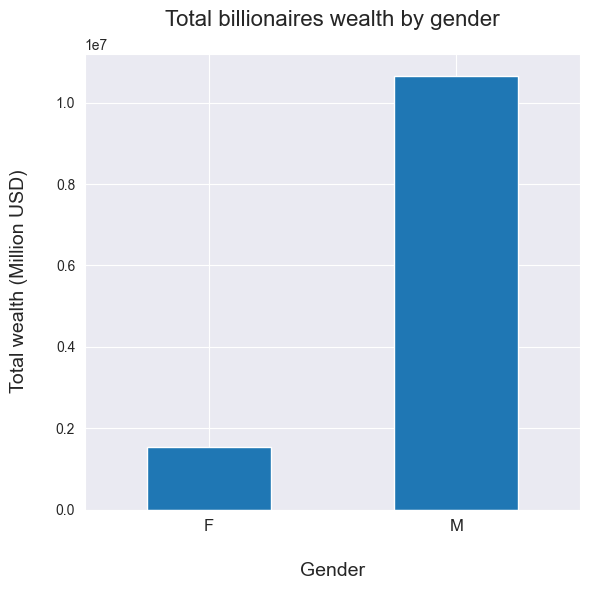

In [28]:
# Create the stacked bar chart
plt.figure(figsize=(8, 8))
total_wealth_gender.plot(kind='bar', stacked=False, figsize=(6, 6), cmap='tab10', legend=False)

# Customize the plot
plt.title('Total billionaires wealth by gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=14, labelpad=20)
plt.ylabel('Total wealth (Million USD)', fontsize=14, labelpad=20)
plt.xticks(ticks=[0, 1], labels=['F', 'M'], rotation=0, fontsize=12)
# plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
mean_wealth_self_made

,selfMade,SelfMadeMeanWealth
0,False,4970.410628
1,True,4465.397351


<Figure size 800x800 with 0 Axes>

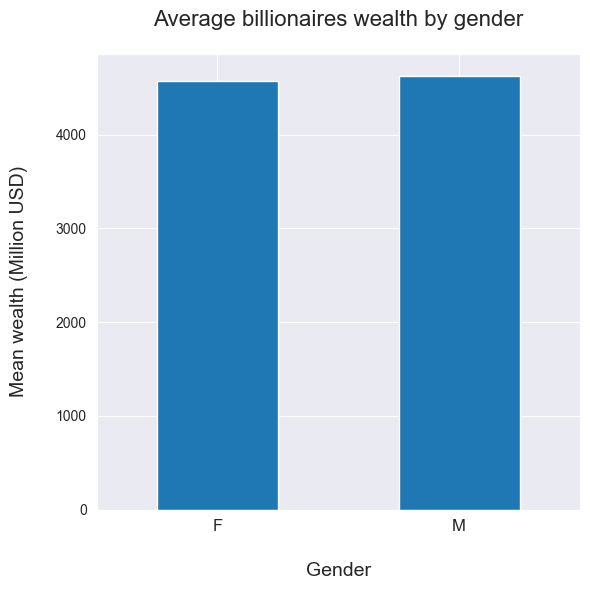

In [30]:
# Create the stacked bar chart
plt.figure(figsize=(8, 8))
mean_wealth_gender.plot(kind='bar', stacked=False, figsize=(6, 6), cmap='tab10', legend=False)

# Customize the plot
plt.title('Average billionaires wealth by gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=14, labelpad=20)
plt.ylabel('Mean wealth (Million USD)', fontsize=14, labelpad=20)
plt.xticks(ticks=[0, 1], labels=['F', 'M'], rotation=0, fontsize=12)
# plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

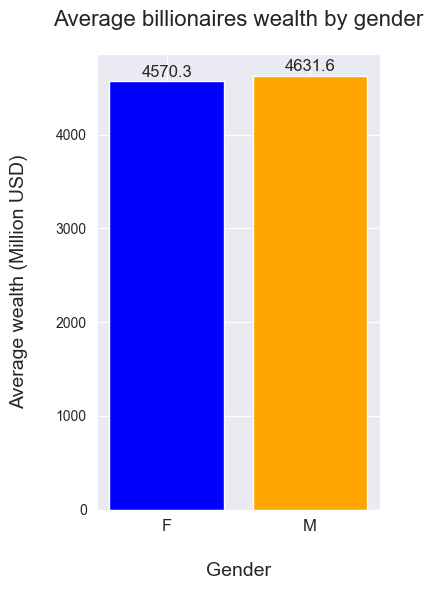

In [34]:
# Extract data for plotting
genders = mean_wealth_gender['gender']
mean_wealths = mean_wealth_gender['GenderMeanWealth']

# Create the bar chart
plt.figure(figsize=(4, 6))
bars = plt.bar(genders, mean_wealths, color=['blue', 'orange'])  # Assign different colors to bars

# Add the mean values as labels on top of each bar
for bar, mean_wealth in zip(bars, mean_wealths):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,  # Adjust for spacing
             f"{mean_wealth:.1f}", 
             ha='center', 
             fontsize=12)

# Customize the plot
plt.title('Average billionaires wealth by gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=14, labelpad=20)
plt.ylabel('Average wealth (Million USD)', fontsize=14, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

In [32]:
total_wealth_gender

,gender,GenderTotalWealth
0,F,1540200
1,M,10666600


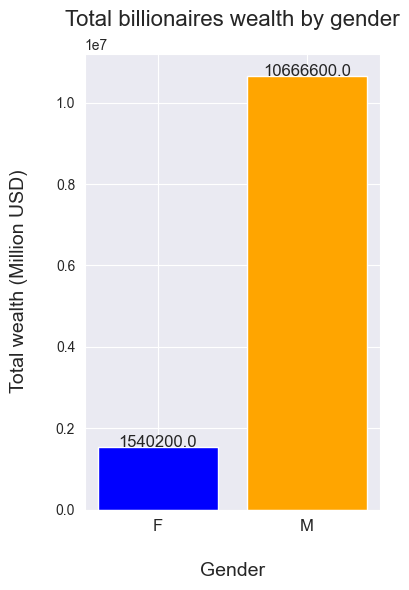

In [33]:
# Extract data for plotting
genders = total_wealth_gender['gender']
total_wealths = total_wealth_gender['GenderTotalWealth']

# Create the bar chart
plt.figure(figsize=(4, 6))
bars = plt.bar(genders, total_wealths, color=['blue', 'orange'])  # Assign different colors to bars

# Add the mean values as labels on top of each bar
for bar, total_wealths in zip(bars, total_wealths):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,  # Adjust for spacing
             f"{total_wealths:.1f}", 
             ha='center', 
             fontsize=12)

# Customize the plot
plt.title('Total billionaires wealth by gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=14, labelpad=20)
plt.ylabel('Total wealth (Million USD)', fontsize=14, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()